In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import subprocess
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
import pathlib
import PyComplexHeatmap as pch

plt.rcParams['pdf.fonttype']=42

In [2]:
_type = 'Hypo'
_dir ='500_result'
to_plot = pd.read_csv(f'{_dir}/{_type}.hotspot.ct.csv', index_col = 0)

In [3]:
to_plot.shape

(3519, 42)

## seperate unique and shared

In [4]:
row_sums = to_plot.sum(axis=1)  # Calculate row sums

In [5]:
to_plot_normalized = to_plot.div(row_sums, axis=0) 

In [6]:
max_values = to_plot_normalized.max(axis = 1)

<AxesSubplot:ylabel='Count'>

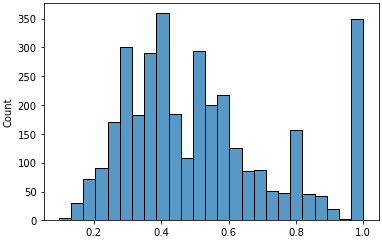

In [7]:
sns.histplot(max_values)

In [8]:
cut_off = 0.8
unique_hotspot = defaultdict(list)
shared_hotspot = []
for _chunk , row in to_plot_normalized.iterrows():
    max_ratio = row.max()
    if max_ratio > cut_off:
        max_ct = row.idxmax()
        unique_hotspot[max_ct].append(_chunk)
    else:
        shared_hotspot.append(_chunk) 

In [9]:
all_hotspot_bed = pd.read_csv(f'{_dir}/{_type}.hotspot.bed', sep = '\t', header = None)
all_hotspot_bed['DMR_ID'] = all_hotspot_bed[0] + '-' + all_hotspot_bed[1].astype(str) +'-' +all_hotspot_bed[2].astype(str)
all_hotspot_bed = all_hotspot_bed.set_index('DMR_ID')

## save bed

In [10]:
tmpdf = all_hotspot_bed.loc[shared_hotspot]

In [11]:
tmpdf.to_csv(f'{_dir}/{_type}.hotspot.shared.bed', sep = '\t', index = None, header= None)

In [12]:
for ct, chunks in unique_hotspot.items():
    if len(chunks) > 100:
        tmpdf = all_hotspot_bed.loc[chunks]
        tmpdf.to_csv(f'{_dir}/{_type}.hotspot.{ct}.bed', sep = '\t', index = None, header= None)
        print(ct)

OPC_NN


In [13]:
# for ct , chunks in unique_hotspot.items():
#     chunk_num = len(chunks)
#     print(f"{ct} has {chunk_num} chunks")

In [14]:
# sns.clustermap(ascii,
#                vmin= 0,
#                vmax = 1,
#                xticklabels=True,
#                yticklabels=False,
#                cmap= 'viridis')

## plot

In [15]:
shared_hotspot_df = all_hotspot_bed.loc[shared_hotspot]
unique_hotspot_df = all_hotspot_bed[~all_hotspot_bed.index.isin(shared_hotspot) ]

In [16]:
row_annot = pd.DataFrame( ['Shared'] * int(shared_hotspot_df.shape[0])+ ['Unique'] * int(unique_hotspot_df.shape[0]), columns=['Hotspot_Type'])
row_annot.index = pd.concat([shared_hotspot_df, unique_hotspot_df]).index
row_annot.head()

,Hotspot_Type
DMR_ID,
chr1-14305000-14305500,Shared
chr1-19460000-19460500,Shared
chr1-33733000-33733500,Shared
chr1-34043500-34044000,Shared
chr1-34121500-34122000,Shared


In [17]:
col_annot = pd.DataFrame(to_plot_normalized.columns, columns=['CellType'], index = to_plot_normalized.columns)
col_annot.head()

,CellType
STR_D1_Sema5a_Gaba,STR_D1_Sema5a_Gaba
Vip_Gaba,Vip_Gaba
MEA-COA_Glut,MEA-COA_Glut
LDT-PCG-CS_Gata3_Lhx1_Gaba,LDT-PCG-CS_Gata3_Lhx1_Gaba
PB_Evx2_Glut,PB_Evx2_Glut


In [18]:
order = list(shared_hotspot_df.index) + list(unique_hotspot_df.index)
to_plot_normalized =to_plot_normalized.loc[order]

In [19]:
import joblib
mt_pelatte = joblib.load('/home/qzeng/project/aging/231117_update_annot/AgingMajorType_Palette')

In [22]:
to_plot_normalized.loc['chr13-68173500-68174000'].sort_values(ascending =False).index

Index(['DG_Glut', 'CA3_Glut', 'L5_ET_CTX_Glut', 'CA1-ProS_Glut',
       'L5_IT_CTX_Glut', 'L6_IT_CTX_Glut', 'L45_IT_CTX_Glut',
       'LA-BLA-BMA-PA_Glut', 'L23_IT_ENT_Glut', 'ENTmv-PA-COAp_Glut',
       'L23_IT_PPP_Glut', 'Oligo_NN', 'OPC_NN', 'L23_IT_CTX_Glut',
       'STR_D1_Sema5a_Gaba', 'PAG_Glut', 'STR_D1_Gaba', 'STR_D2_Gaba',
       'STR_Gaba', 'STR-PAL_Chst9_Gaba', 'NDB-SI-MA-STRv_Lhx8_Gaba',
       'Pvalb_Gaba', 'Sst_Gaba', 'SUB-ProS_Glut', 'MEA-BST_Gaba',
       'L6_CT_CTX_Glut', 'NP_SUB_Glut', 'L6bCT_ENT_Glut', 'Vip_Gaba',
       'MB-MY_Tph2_Glut-Sero', 'Lamp5_Gaba', 'CEA-BST_Gaba',
       'L2_IT_PPP-APr_Glut', 'L5_NP_CTX_Glut', 'Microglia_NN', 'Astro-TE_NN',
       'Astro-NT_NN', 'PAG-PPN_Pax5_Sox21_Gaba', 'PB_Evx2_Glut',
       'LDT-PCG-CS_Gata3_Lhx1_Gaba', 'MEA-COA_Glut', 'Sst_Chodl_Gaba'],
      dtype='object')

In [25]:
tmp = to_plot_normalized.loc['chr13-68173500-68174000']

In [27]:
plot_celltypes = tmp[tmp != 0].index

Index(['CA1-ProS_Glut', 'L5_IT_CTX_Glut', 'L23_IT_ENT_Glut', 'DG_Glut',
       'L6_IT_CTX_Glut', 'L5_ET_CTX_Glut', 'CA3_Glut', 'L23_IT_PPP_Glut',
       'ENTmv-PA-COAp_Glut', 'L45_IT_CTX_Glut', 'LA-BLA-BMA-PA_Glut'],
      dtype='object')

In [22]:
new_mt_palette = {}
for mt ,_color in mt_pelatte.items():
    mt= mt.replace('/','').replace(' ','_')
    new_mt_palette[mt] = _color
   

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations


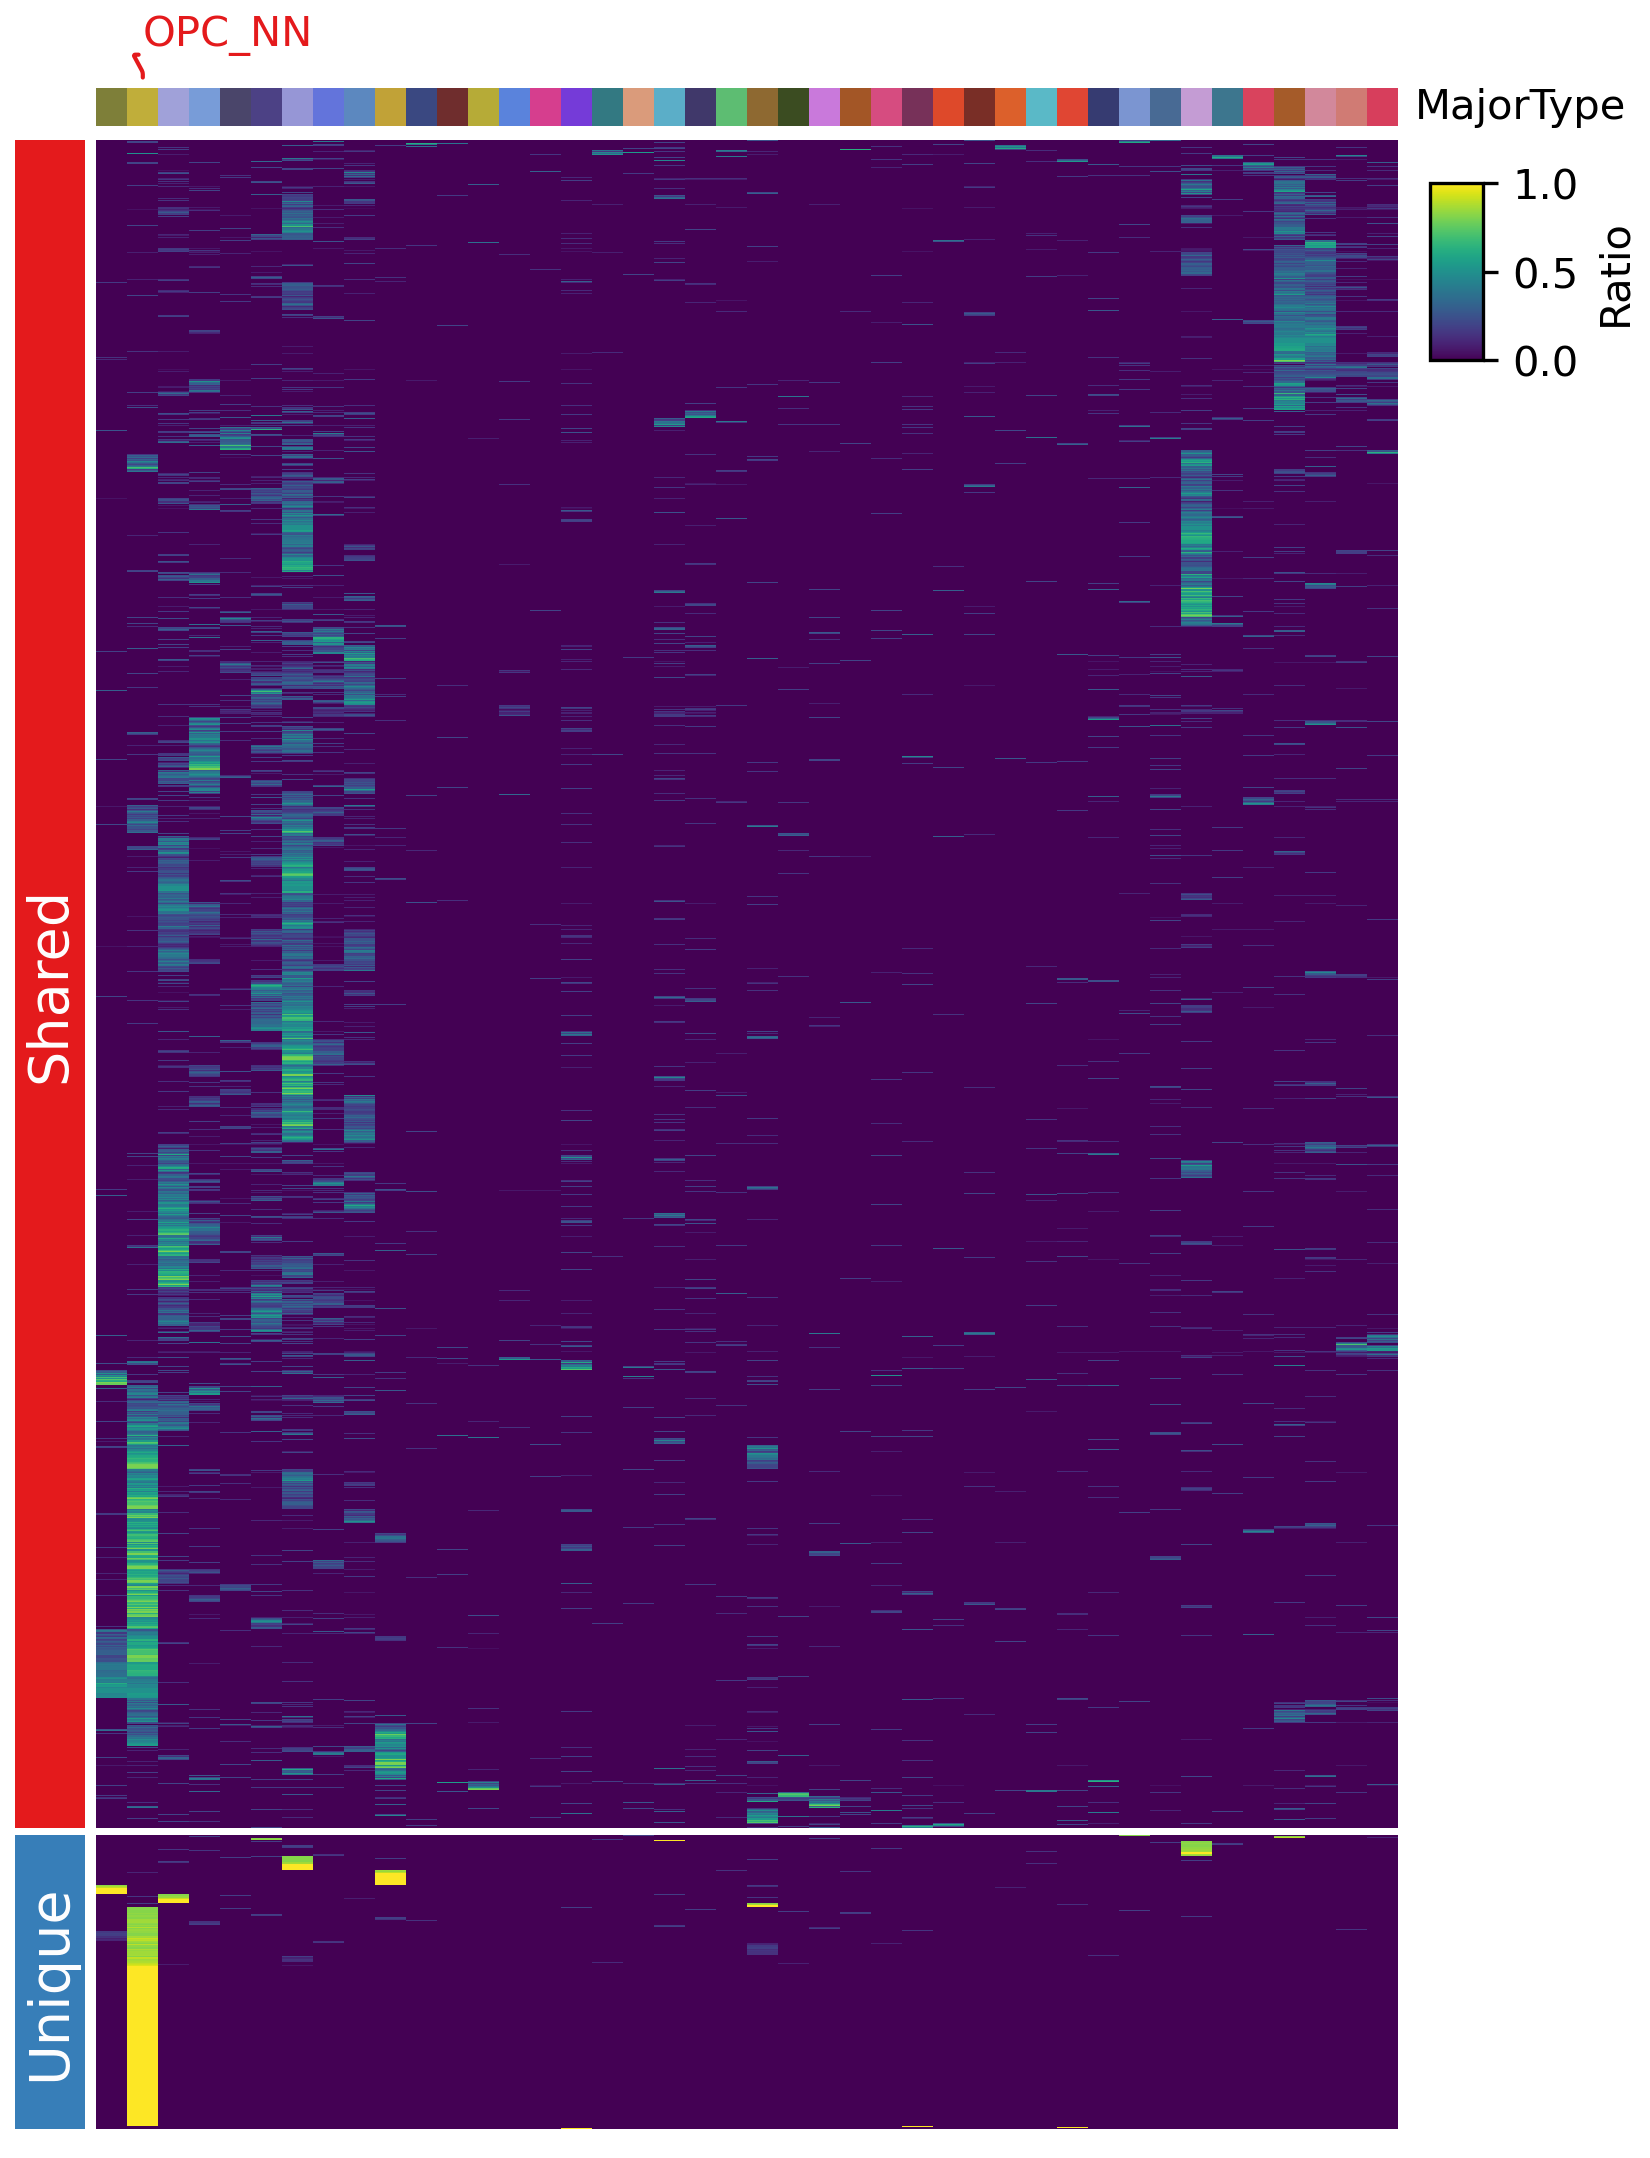

In [23]:
col_ha = pch.HeatmapAnnotation(label=pch.anno_label(col_annot.CellType.apply(lambda x:x if x=='OPC_NN' else None), merge=True,rotation=0,),
                            MajorType=pch.anno_simple(col_annot.CellType,add_text=False,legend=False, colors = new_mt_palette, height = 3), axis=1,
                           legend=False,legend_gap=5,hgap=0.5, )

row_ha = pch.HeatmapAnnotation(#label=pch.anno_label(row_annot.Hotspot_Type, merge=True,rotation=15, ),
                            Hotspot_Type=pch.anno_simple(row_annot.Hotspot_Type,add_text=True,legend=False,height = 6), axis=0,
                           legend=False,legend_gap=5,hgap=0.5, label_kws=dict(visible=False))

plt.figure(figsize=(6, 8), dpi = 300)
cm = pch.ClusterMapPlotter(data=to_plot_normalized,
                       left_annotation=row_ha,top_annotation=col_ha,
                       row_cluster=True,col_cluster = True,
                       row_split=row_annot.Hotspot_Type,
                       row_split_gap=0.5,
                       label='Ratio',rasterized=True,
                       show_rownames=False,show_colnames=False,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='viridis',xticklabels_kws={'labelrotation':-90,'labelcolor':'black'})

plt.savefig(f"figure/{_type}.shared_unique.heatmap.pdf", bbox_inches='tight')
plt.show()